In [1]:
# imported libs for scaling
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

#custom import

import wrangle

# Exercises

* Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [2]:
# importing wrangles data
df = wrangle.wrangle_zillow()
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


* Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [3]:
# Split Data!
seed = 42

train, val_test = train_test_split(df, train_size=0.7,
                                   random_state=seed)

val, test = train_test_split(val_test, train_size=0.5,
                             random_state=seed)
train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

__________________________________________________________________________________

In [4]:
train['tax_value'].max()

90188462

In [5]:
# additional manipulation
train = train[(train['tax_value'] < 3_000_000) & (train['tax_amount'] < 3_000_000)]

## MinMaxScaler

In [6]:
# assigned mms as variable for min max scaler function from sklearn
mms = MinMaxScaler()

# fit scaler to train
mms.fit(train[['tax_value']])

MinMaxScaler()

In [7]:
train['tax_value_mms'] = mms.transform(train[['tax_value']])
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,tax_value_mms
1001601,3,2.0,1452,241012,1980,2974.81,6037,0.080333
611989,3,2.0,1262,235630,1953,3029.22,6037,0.078539
658616,3,1.0,1447,435123,1947,5226.67,6037,0.145039
835115,3,2.0,1403,268770,1965,2849.62,6111,0.089586
242295,3,2.0,1456,365000,1961,4582.48,6037,0.121664


In [8]:
# defined function to populate visual of distributions to check for shape of the data prior to and after scaling
def compare_data(scaled_col, df = train, original = 'tax_value'):
    
    plt.figure(figsize=(11, 7))

    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=40)
    
    plt.subplot(122)
    sns.histplot(data=df, x=scaled_col, bins=40)
    
    plt.show()

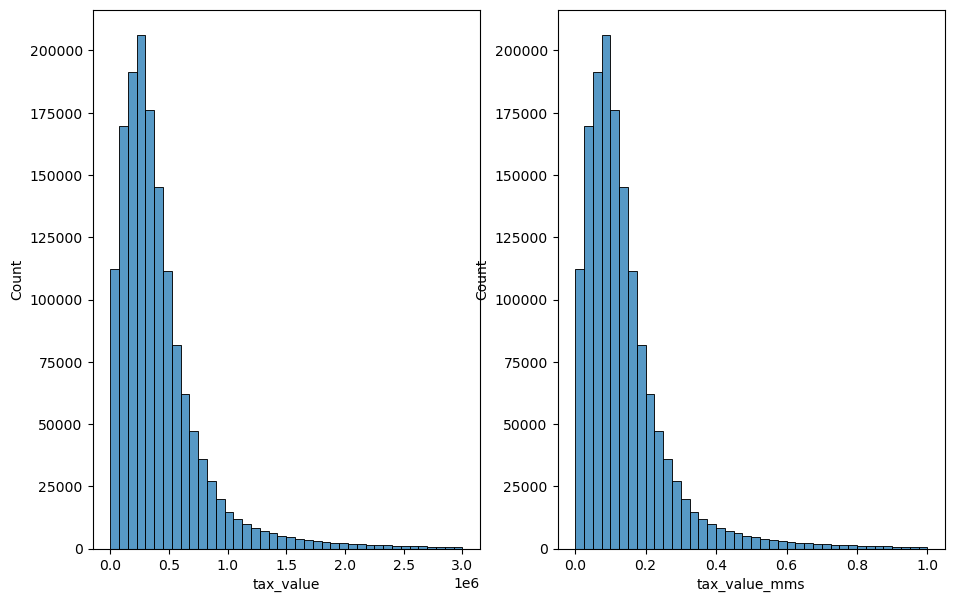

In [9]:
compare_data('tax_value_mms')

__________________________________________________________________________________

## StandardScaler

In [10]:
ss = StandardScaler()

ss.fit(train[['tax_value']])

train['tax_value_ss'] = ss.transform(train[['tax_value']])

train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,tax_value_mms,tax_value_ss
1001601,3,2.0,1452,241012,1980,2974.81,6037,0.080333,-0.479368
611989,3,2.0,1262,235630,1953,3029.22,6037,0.078539,-0.493712
658616,3,1.0,1447,435123,1947,5226.67,6037,0.145039,0.037979
835115,3,2.0,1403,268770,1965,2849.62,6111,0.089586,-0.405387
242295,3,2.0,1456,365000,1961,4582.48,6037,0.121664,-0.148913


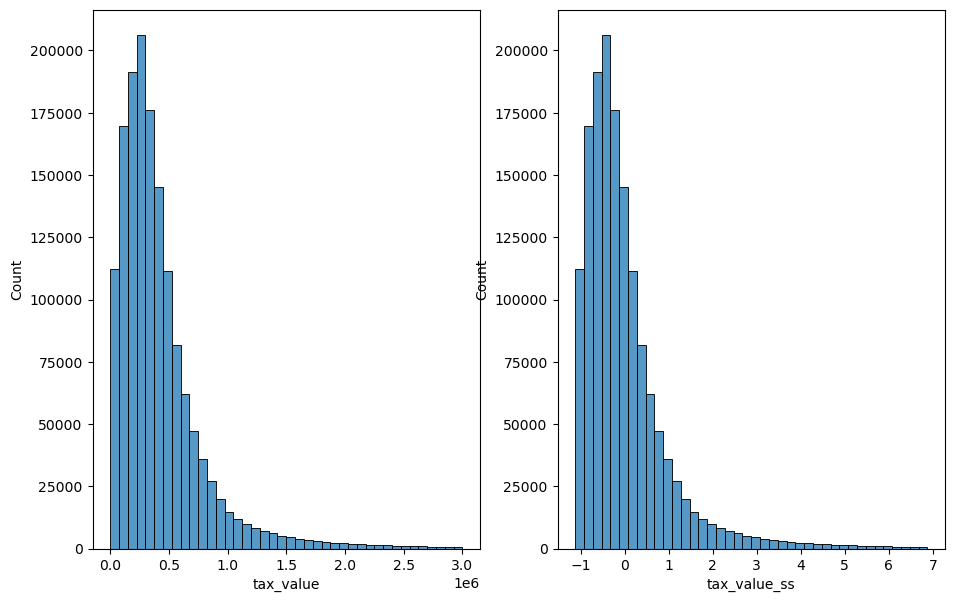

In [11]:
compare_data('tax_value_ss')

__________________________________________________________________________________

## RobustScaler

In [12]:
rs = RobustScaler()

rs.fit(train[['tax_value']])

train['tax_value_rs'] = rs.transform(train[['tax_value']])

train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,tax_value_mms,tax_value_ss,tax_value_rs
1001601,3,2.0,1452,241012,1980,2974.81,6037,0.080333,-0.479368,-0.249325
611989,3,2.0,1262,235630,1953,3029.22,6037,0.078539,-0.493712,-0.265194
658616,3,1.0,1447,435123,1947,5226.67,6037,0.145039,0.037979,0.323038
835115,3,2.0,1403,268770,1965,2849.62,6111,0.089586,-0.405387,-0.167477
242295,3,2.0,1456,365000,1961,4582.48,6037,0.121664,-0.148913,0.116271


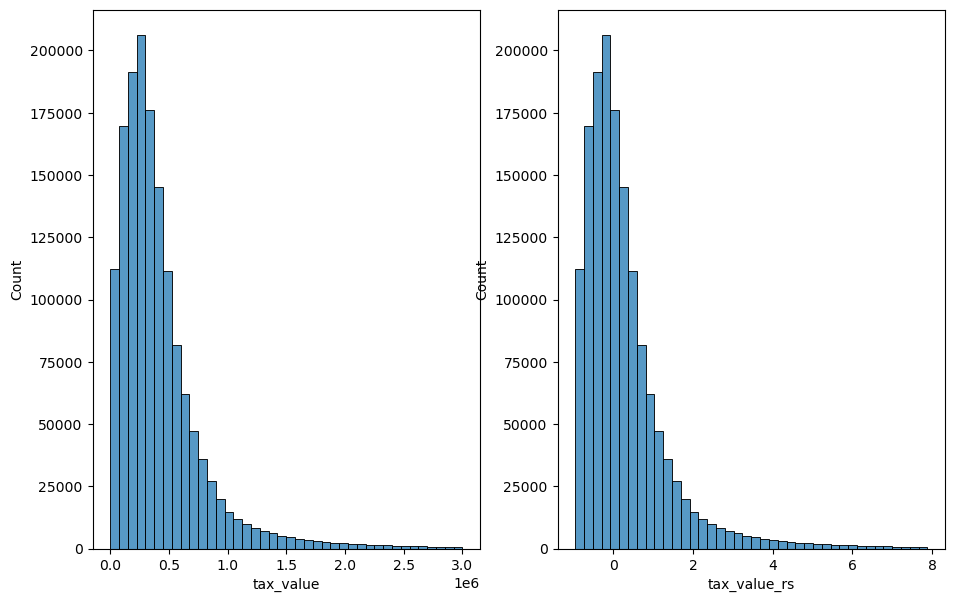

In [13]:
compare_data('tax_value_rs')

In [14]:
train.tax_value.max()

2999902

* Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

    - it looks the same, maybe there might be some slight differences not 100% sure.

In [15]:
mms = MinMaxScaler()

# fit scaler to the tax_value column in the train DataFrame
mms.fit(train[['tax_value']])

# Transformed tax_value column
train['tax_value_mms'] = mms.transform(train[['tax_value']])

# reverse transformation and obtain the original values:
train['tax_value_original'] = mms.inverse_transform(train[['tax_value_mms']])

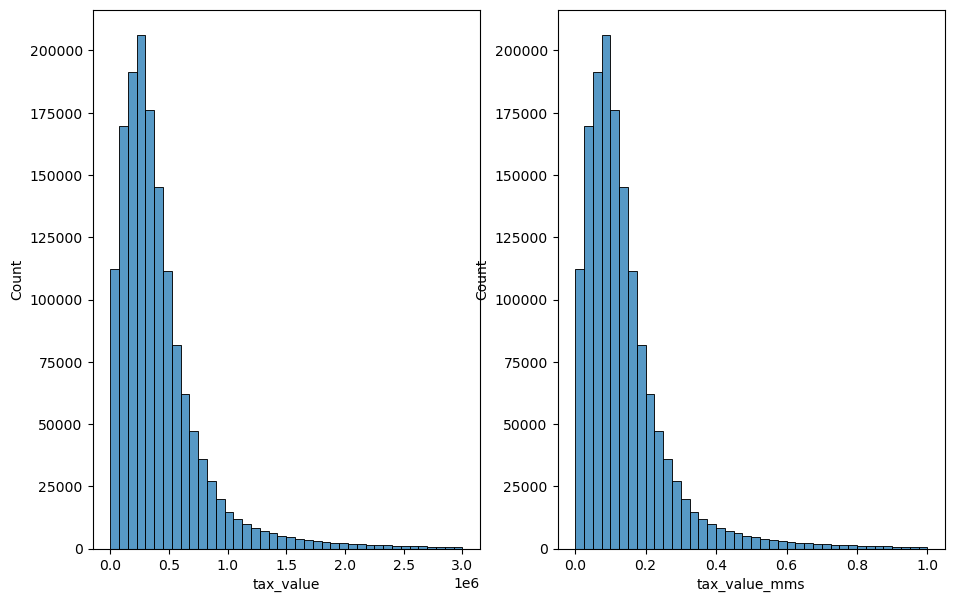

In [16]:
compare_data('tax_value_mms')

* Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [17]:
qt = QuantileTransformer(output_distribution='normal', n_quantiles=10, random_state=seed)

qt.fit(train[['tax_value']])

train['tax_value_qt'] = qt.transform(train[['tax_value']])

train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,tax_value_mms,tax_value_ss,tax_value_rs,tax_value_original,tax_value_qt
1001601,3,2.0,1452,241012,1980,2974.81,6037,0.080333,-0.479368,-0.249325,241012.0,-0.385658
611989,3,2.0,1262,235630,1953,3029.22,6037,0.078539,-0.493712,-0.265194,235630.0,-0.413485
658616,3,1.0,1447,435123,1947,5226.67,6037,0.145039,0.037979,0.323038,435123.0,0.411299
835115,3,2.0,1403,268770,1965,2849.62,6111,0.089586,-0.405387,-0.167477,268770.0,-0.246267
242295,3,2.0,1456,365000,1961,4582.48,6037,0.121664,-0.148913,0.116271,365000.0,0.161192


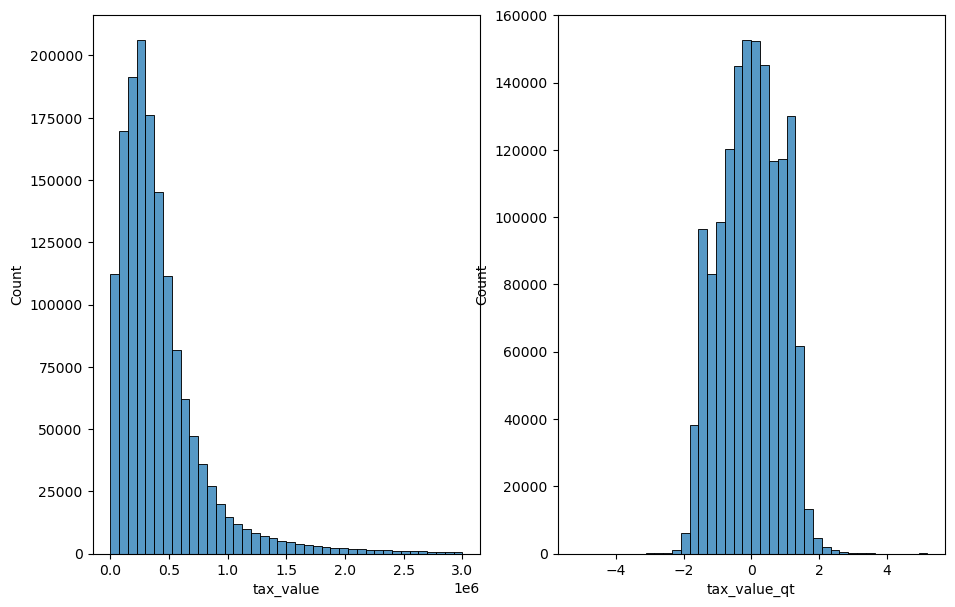

In [18]:
compare_data('tax_value_qt')

* Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [19]:
qt = QuantileTransformer(n_quantiles=10, random_state=seed)

qt.fit(train[['tax_value']])

train['tax_value_qt'] = qt.transform(train[['tax_value']])

train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,tax_value_mms,tax_value_ss,tax_value_rs,tax_value_original,tax_value_qt
1001601,3,2.0,1452,241012,1980,2974.81,6037,0.080333,-0.479368,-0.249325,241012.0,0.349875
611989,3,2.0,1262,235630,1953,3029.22,6037,0.078539,-0.493712,-0.265194,235630.0,0.339626
658616,3,1.0,1447,435123,1947,5226.67,6037,0.145039,0.037979,0.323038,435123.0,0.659573
835115,3,2.0,1403,268770,1965,2849.62,6111,0.089586,-0.405387,-0.167477,268770.0,0.402738
242295,3,2.0,1456,365000,1961,4582.48,6037,0.121664,-0.148913,0.116271,365000.0,0.564029


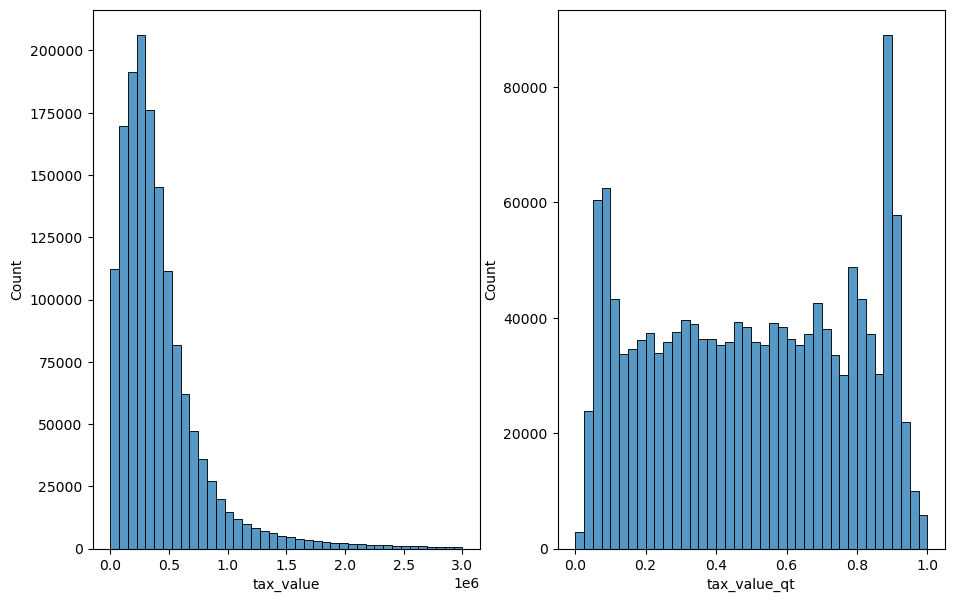

In [20]:
compare_data('tax_value_qt')

* Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

* ✔️

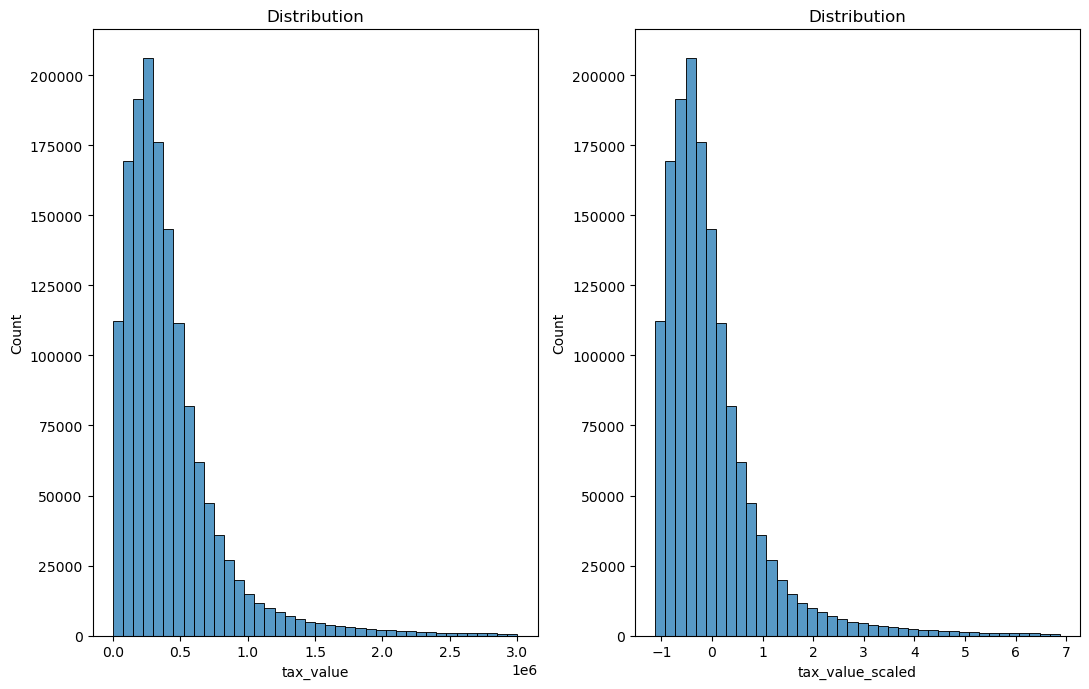

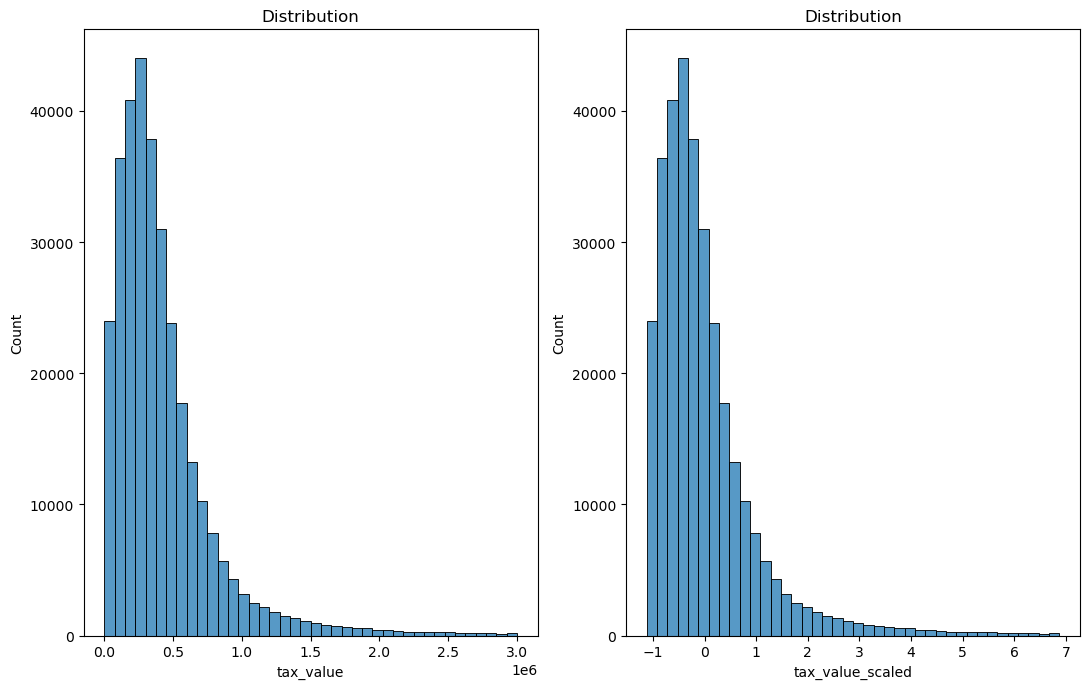

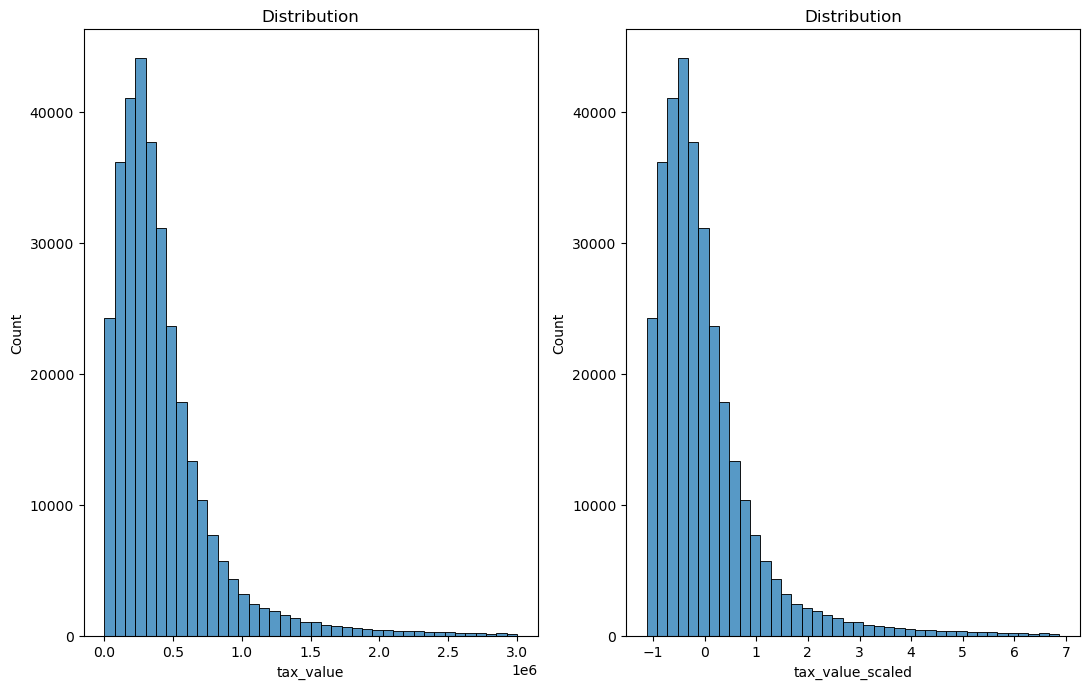

In [40]:
def compare_data(scaled_col, df=(train, val, test), original='tax_value'):
    plt.figure(figsize=(11, 7))

    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=40)
    plt.title(f'Distribution')
    
    plt.subplot(122)
    sns.histplot(data=df, x=scaled_col, bins=40)
    plt.title(f'Distribution')

    plt.tight_layout()
    plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - - - - - - - - - - - 

# Define a function for scaling the data
def scale_data(train, val, test, scaler):
    
    # Fit the scaler on the training data
    scaler.fit(train[['tax_value']])
    
    # Transform the data for each split
    train['tax_value_scaled'] = scaler.transform(train[['tax_value']])
    val['tax_value_scaled'] = scaler.transform(val[['tax_value']])
    test['tax_value_scaled'] = scaler.transform(test[['tax_value']])
    
    return train, val, test

# Load and wrangle data
df = wrangle.wrangle_zillow()

# Split the data
seed = 42

train, val_test = train_test_split(df, train_size=0.7, random_state=seed)
val, test = train_test_split(val_test, train_size=0.5, random_state=seed)

# Filter data
train = train[(train['tax_value'] < 3_000_000) & (train['tax_amount'] < 3_000_000)]
val = val[(val['tax_value'] < 3_000_000) & (val['tax_amount'] < 3_000_000)]
test = test[(test['tax_value'] < 3_000_000) & (test['tax_amount'] < 3_000_000)]

# different scalers
mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()
qt = QuantileTransformer(output_distribution='normal', n_quantiles=10, random_state=seed)

# train, val, test = scale_data(train, val, test, mms)
train, val, test = scale_data(train, val, test, ss)
# train, val, test = scale_data(train, val, test, rs)
# train, val, test = scale_data(train, val, test, qt)

# Compare distributions for each scaled column
compare_data('tax_value_scaled', train)
compare_data('tax_value_scaled', val)
compare_data('tax_value_scaled', test)